<a href="https://colab.research.google.com/github/spacee48/SIT719/blob/main/5_2_dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SECTION 1: DECLARE THE MODULES**

In [26]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**SECTION 2: Data import and preprocess**

**Run this but don't worry if it does not make any sense Jump to SECTION 3 that is related to your HD task.**

In [27]:
!pip install wget
import wget

link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data)

In [29]:
DataSet

'training_attack_types (1).txt'

In [30]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']

# differentiating between nominal, binary, and numeric features
# root_shell is marked as a continuos feature in the kddcup.names
# file, but it is supposed to be a binary feature according to the
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [31]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
  for line in f.readlines():
    attack, cat = line.strip().split(' ')
    category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [32]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [33]:
# processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'

train_df = pd.read_csv(train_file, names=header_names)
train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True)

In [34]:
# processing test Data

test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                              .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

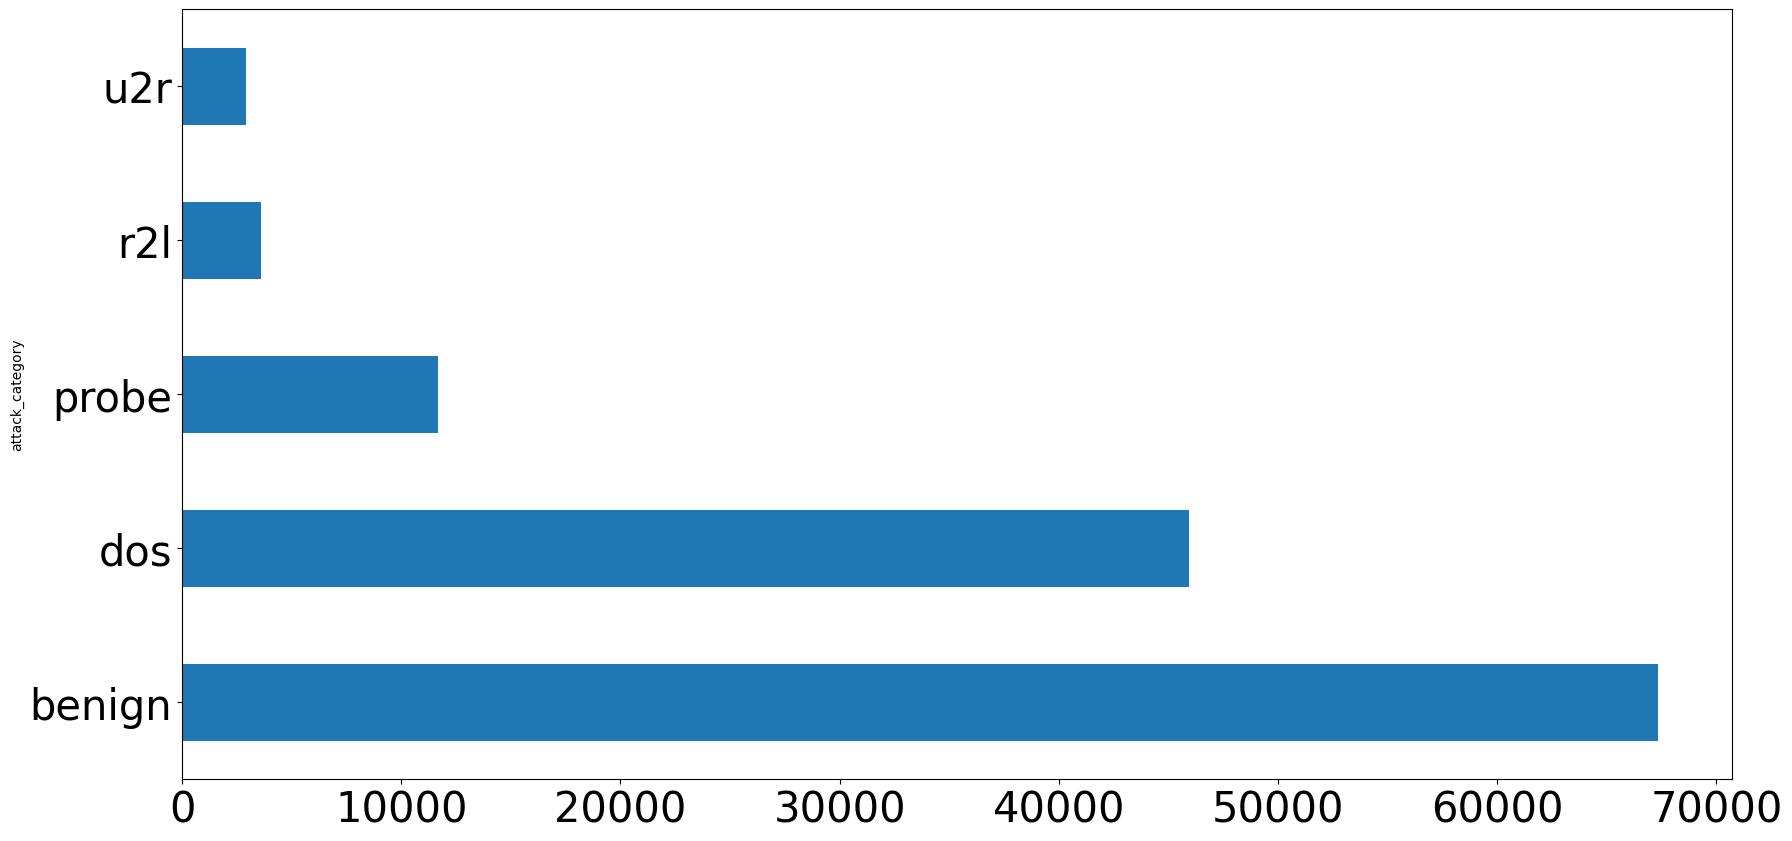

In [35]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()

train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)

train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

# now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)

numeric_cols.remove('num_outbound_cmds')

# data preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)

combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# store dummy variable feature names

dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()

# experimenting with StandardScaler on the single 'duration' feature

from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# experimenting with MinMaxScaler on the single 'duration' feature

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# experimenting with RobustScaler on the single 'duration' feature

from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# experimenting with MaxAbsScaler on the single 'duration' feature

from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# let's proceed with StandardScaler- apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])

train_x.describe()

train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

**SECTION 3: Multi class classification**

**This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms**


Training: Decision Tree


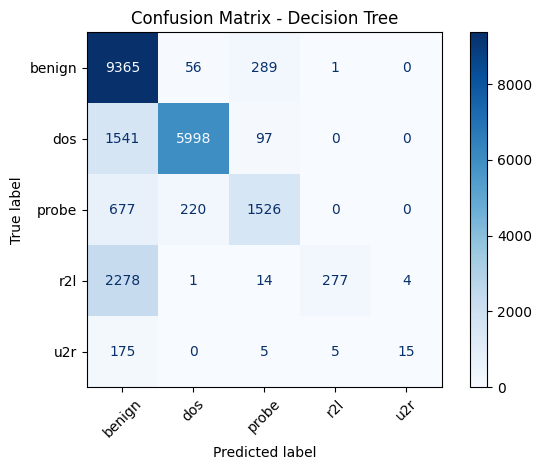


Training: Random Forest


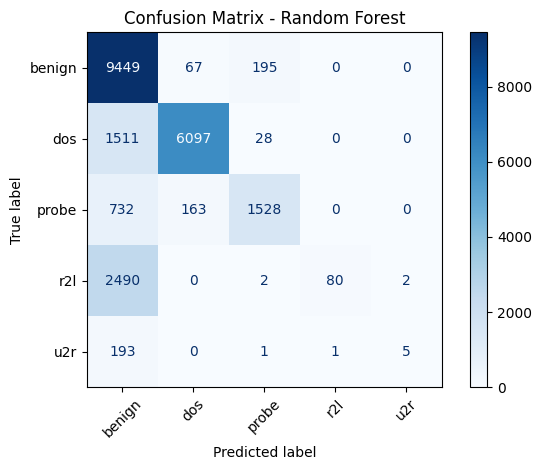


Training: Logistic Regression


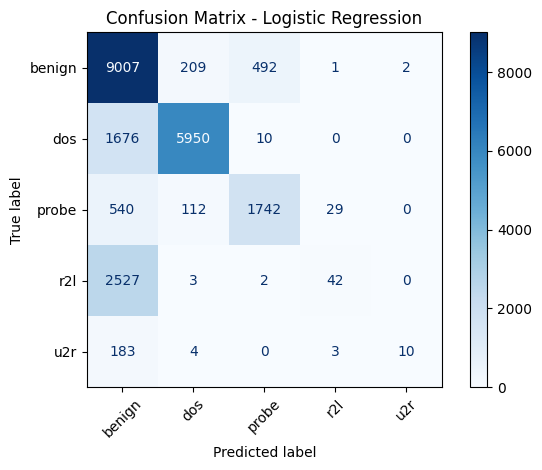


Training: SVM


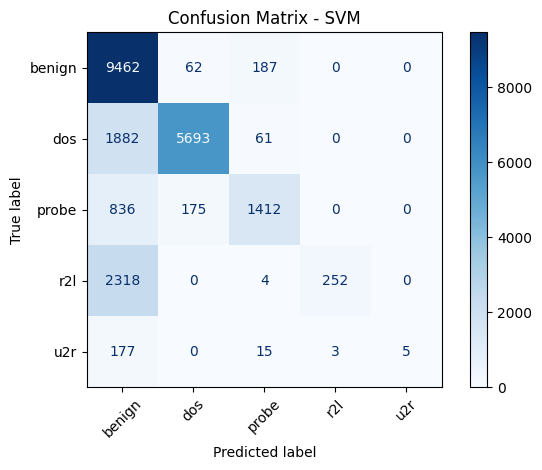


Training: KNN


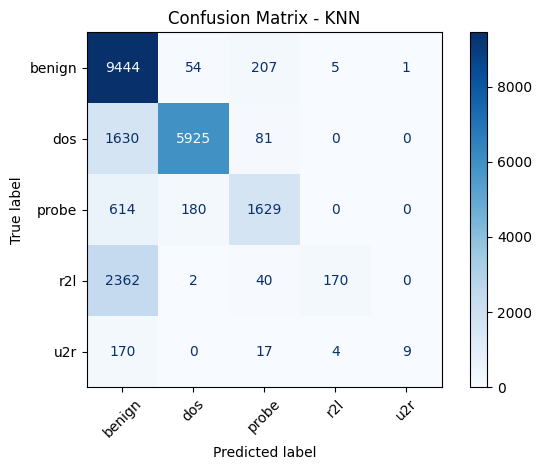

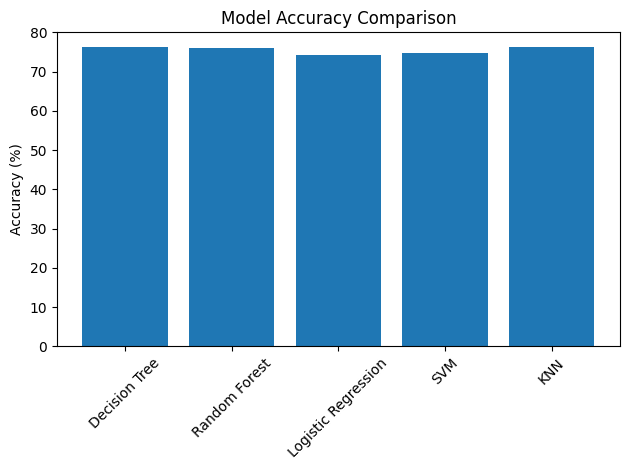

In [39]:
# 5-class classification version

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, classification_report, accuracy_score, ConfusionMatrixDisplay

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=17),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_features=17),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
  print(f"\nTraining: {name}")
  model.fit(train_x, train_Y)
  pred_y = model.predict(test_x)

  acc = accuracy_score(test_Y, pred_y)
  error = zero_one_loss(test_Y, pred_y)
  report = classification_report(test_Y, pred_y, output_dict=True)
  cm = confusion_matrix(test_Y, pred_y, labels=model.classes_ if hasattr(model, 'classes_') else sorted(set(test_Y)))

  results[name] = {
      "accuracy": acc,
      "error": error,
      "report": report,
      "confusion_matrix": cm,
      "labels": model.classes_ if hasattr(model, 'classes_') else sorted(set(test_Y))
  }

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=results[name]['labels'])
  disp.plot(cmap=plt.cm.Blues)
  plt.title(f"Confusion Matrix - {name}")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

plt.bar(results.keys(), [results[m]['accuracy'] * 100 for m in results])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

summary = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [round(results[m]['accuracy'] * 100, 2) for m in results],
    "Error Rate": [round(results[m]['error'], 4) for m in results]
})

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

def calculate_fpr(cm):
    fpr_per_class = []
    for i in range(len(cm)):
        FP = cm[:, i].sum() - cm[i, i]
        TN = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
        fpr_per_class.append(round(fpr * 100, 2))
    return fpr_per_class

# Extract and print metrics for each model
for name, model_result in results.items():
    print(f"\n=== Metrics Table for {name} ===")
    report = model_result["report"]
    labels = model_result["labels"]
    cm = model_result["confusion_matrix"]

    fprs = calculate_fpr(cm)

    rows = []
    for i, label in enumerate(labels):
        if label not in report:
            continue
        row = {
            "Attack Class": label,
            "Precision (%)": round(report[label]["precision"] * 100, 2),
            "Recall (%)": round(report[label]["recall"] * 100, 2),
            "F1-Score (%)": round(report[label]["f1-score"] * 100, 2),
            "FPR (%)": fprs[i]
        }
        rows.append(row)

    df_metrics = pd.DataFrame(rows)
    print(df_metrics)



=== Metrics Table for Decision Tree ===
  Attack Class  Precision (%)  Recall (%)  F1-Score (%)  FPR (%)
0       benign          66.72       96.44         78.87    36.40
1          dos          95.59       78.55         86.23     1.86
2        probe          79.03       62.98         70.10     2.01
3          r2l          97.88       10.76         19.39     0.03
4          u2r          78.95        7.50         13.70     0.02

=== Metrics Table for Random Forest ===
  Attack Class  Precision (%)  Recall (%)  F1-Score (%)  FPR (%)
0       benign          65.73       97.30         78.46    38.39
1          dos          96.36       79.85         87.33     1.54
2        probe          87.12       63.06         73.16     1.12
3          r2l          98.77        3.11          6.03     0.01
4          u2r          71.43        2.50          4.83     0.01

=== Metrics Table for Logistic Regression ===
  Attack Class  Precision (%)  Recall (%)  F1-Score (%)  FPR (%)
0       benign          64

In [44]:
summary_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy (%)": [round(results[m]['accuracy'] * 100, 2) for m in results]
})

print(summary_df)

                 Model  Accuracy (%)
0        Decision Tree         76.21
1        Random Forest         76.11
2  Logistic Regression         74.30
3                  SVM         74.63
4                  KNN         76.19



=== Training: Decision Tree ===
Accuracy for Decision Tree: 76.21%

=== Metrics Table for Decision Tree ===
  Attack Class  Precision (%)  Recall (%)  F1-Score (%)  FPR (%)
0       benign          66.72       96.44         78.87    36.40
1          dos          95.59       78.55         86.23     1.86
2        probe          79.03       62.98         70.10     2.01
3          r2l          97.88       10.76         19.39     0.03
4          u2r          78.95        7.50         13.70     0.02


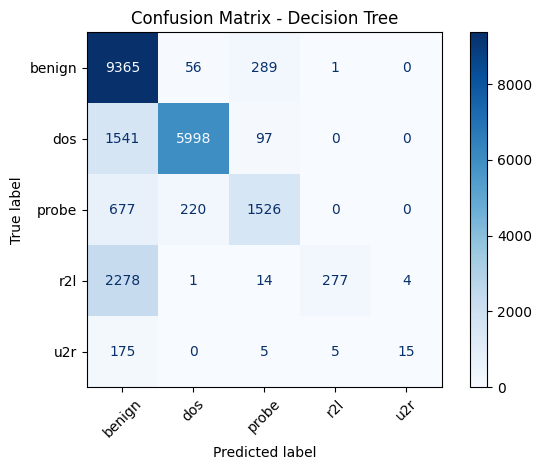


=== Training: Random Forest ===
Accuracy for Random Forest: 75.11%

=== Metrics Table for Random Forest ===
  Attack Class  Precision (%)  Recall (%)  F1-Score (%)  FPR (%)
0       benign          65.13       97.38         78.06    39.45
1          dos          96.25       77.65         85.95     1.55
2        probe          82.27       59.93         69.34     1.56
3          r2l          96.88        3.61          6.97     0.02
4          u2r          33.33        0.50          0.99     0.01


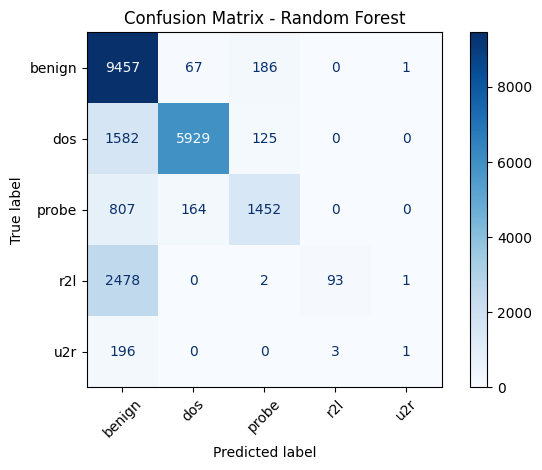


=== Training: Logistic Regression ===
Accuracy for Logistic Regression: 74.30%

=== Metrics Table for Logistic Regression ===
  Attack Class  Precision (%)  Recall (%)  F1-Score (%)  FPR (%)
0       benign          64.65       92.75         76.19    38.39
1          dos          94.78       77.92         85.53     2.20
2        probe          77.56       71.89         74.62     2.50
3          r2l          56.00        1.63          3.17     0.17
4          u2r          83.33        5.00          9.43     0.01


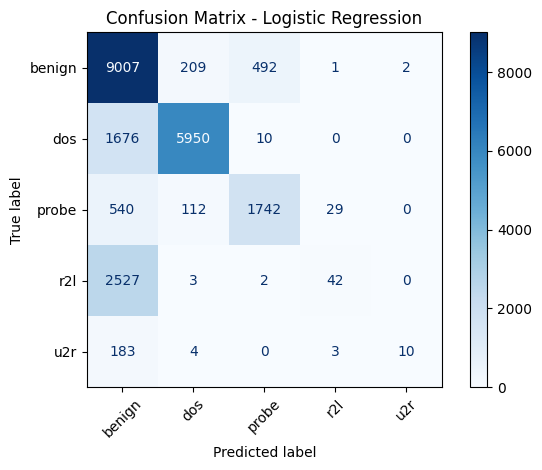


=== Training: SVM ===
Accuracy for SVM: 74.63%

=== Metrics Table for SVM ===
  Attack Class  Precision (%)  Recall (%)  F1-Score (%)  FPR (%)
0       benign          64.48       97.44         77.60    40.62
1          dos          96.00       74.55         83.93     1.59
2        probe          84.10       58.27         68.84     1.33
3          r2l          98.82        9.79         17.82     0.02
4          u2r         100.00        2.50          4.88     0.00


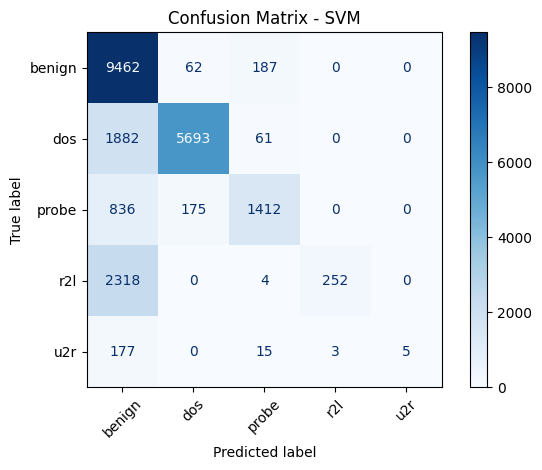


=== Training: KNN ===
Accuracy for KNN: 76.19%

=== Metrics Table for KNN ===
  Attack Class  Precision (%)  Recall (%)  F1-Score (%)  FPR (%)
0       benign          66.41       97.25         78.93    37.22
1          dos          96.17       77.59         85.89     1.58
2        probe          82.52       67.23         74.10     1.71
3          r2l          94.97        6.60         12.35     0.05
4          u2r          90.00        4.50          8.57     0.00


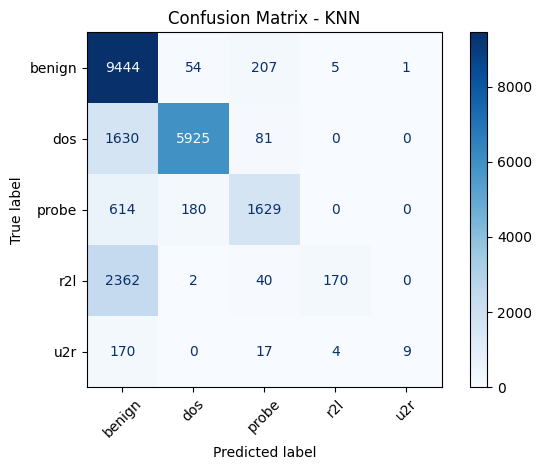

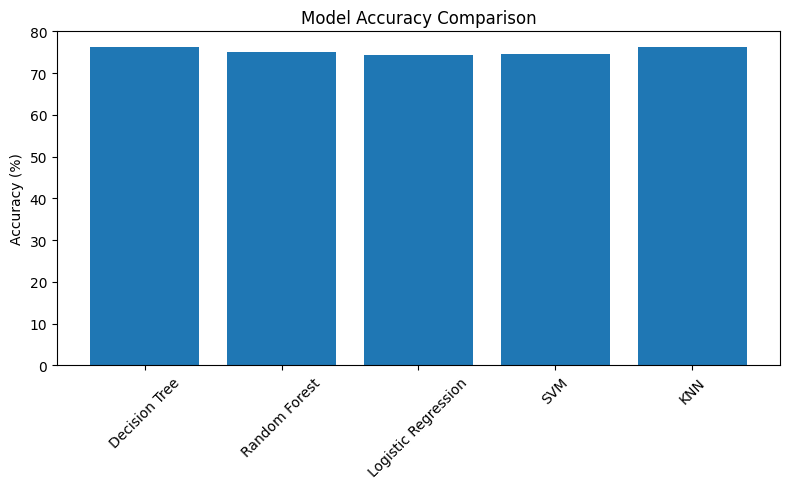


=== Final Model Summary Table ===
                 Model  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)  \
0        Decision Tree         76.21          83.63       51.25         53.66   
1        Random Forest         75.11          74.77       47.81         48.26   
2  Logistic Regression         74.30          75.26       49.84         49.79   
3                  SVM         74.63          88.68       48.51         50.61   
4                  KNN         76.19          86.02       50.64         51.97   

   Avg FPR (%)  
0         8.06  
1         8.52  
2         8.65  
3         8.71  
4         8.11  


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    ConfusionMatrixDisplay, zero_one_loss, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import pandas as pd

# === Define Classifiers ===
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=17),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=17),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}

# === Utility: FPR Calculation ===
def calculate_fpr(cm):
    fpr_list = []
    for i in range(len(cm)):
        FP = cm[:, i].sum() - cm[i, i]
        TN = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
        fpr_list.append(round(fpr * 100, 2))
    return fpr_list

# === Train and Evaluate ===
for name, model in models.items():
    print(f"\n=== Training: {name} ===")
    model.fit(train_x, train_Y)
    pred_y = model.predict(test_x)

    acc = accuracy_score(test_Y, pred_y)
    print(f"Accuracy for {name}: {acc * 100:.2f}%")

    report = classification_report(test_Y, pred_y, output_dict=True)
    cm = confusion_matrix(test_Y, pred_y, labels=model.classes_ if hasattr(model, 'classes_') else sorted(set(test_Y)))
    fprs = calculate_fpr(cm)
    labels = model.classes_ if hasattr(model, 'classes_') else sorted(set(test_Y))

    # Per-class table
    print(f"\n=== Metrics Table for {name} ===")
    table = []
    for i, label in enumerate(labels):
        if label not in report:
            continue
        row = {
            "Attack Class": label,
            "Precision (%)": round(report[label]["precision"] * 100, 2),
            "Recall (%)": round(report[label]["recall"] * 100, 2),
            "F1-Score (%)": round(report[label]["f1-score"] * 100, 2),
            "FPR (%)": fprs[i]
        }
        table.append(row)

    df_metrics = pd.DataFrame(table)
    print(df_metrics)

    # Save everything
    results[name] = {
        "accuracy": acc,
        "report": report,
        "confusion_matrix": cm,
        "fpr_list": fprs,
        "predictions": pred_y,
        "metrics_table": df_metrics
    }

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# === Accuracy Comparison Chart ===
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [results[m]['accuracy'] * 100 for m in results])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Final Summary Table ===
summary = []
for name, data in results.items():
    pred = data["predictions"]
    precision = precision_score(test_Y, pred, average='macro') * 100
    recall = recall_score(test_Y, pred, average='macro') * 100
    f1 = f1_score(test_Y, pred, average='macro') * 100
    avg_fpr = sum(data["fpr_list"]) / len(data["fpr_list"])

    summary.append({
        "Model": name,
        "Accuracy (%)": round(data["accuracy"] * 100, 2),
        "Precision (%)": round(precision, 2),
        "Recall (%)": round(recall, 2),
        "F1-Score (%)": round(f1, 2),
        "Avg FPR (%)": round(avg_fpr, 2)
    })

summary_df = pd.DataFrame(summary)
print("\n=== Final Model Summary Table ===")
print(summary_df)


**Step 7: Data Visualization**